# Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and & Deriving Data
#### 2. Creating Visuals
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Hypotheses & Questions 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

path = r'/Users/aahamoustafa/Desktop/Data Projects/CitiBike'

trips_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_new.csv') ,index_col = False)
stations = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike-stations.csv'))


In [46]:

pd.set_option('display.max_columns', None)

trips_new.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,usertype_encoded,gender_encoded,age,start_hour,stop_hour,start_day,stop_day,month,year,weekday,trip_distance,weekday_encoded,Age_Distribution,tripduration_minutes,startdate,stopdate
0,0,2319,2016-03-09 13:08:21,2016-03-09 13:47:01,520,W 52 St & 5 Ave,40.759923,-73.976485,363,West Thames St,40.708347,-74.017134,23062,Subscriber,male,1,1,44.0,13,13,9,9,3,2016,Wednesday,6.677860,2,Adults,39.0,2016-03-09,2016-03-09
1,1,313,2015-07-09 15:42:30,2015-07-09 15:47:44,520,W 52 St & 5 Ave,40.759923,-73.976485,493,W 45 St & 6 Ave,40.756800,-73.982912,16909,Subscriber,female,1,0,47.0,15,15,9,9,7,2015,Thursday,0.643981,3,Adults,5.0,2015-07-09,2015-07-09
2,2,798,2017-04-20 18:43:59,2017-04-20 18:57:17,520,W 52 St & 5 Ave,40.759923,-73.976485,3258,W 27 St & 10 Ave,40.750182,-74.002184,15555,Subscriber,male,1,1,26.0,18,18,20,20,4,2017,Thursday,2.424841,3,Youths,13.0,2017-04-20,2017-04-20
3,3,3100,2017-04-23 15:23:46,2017-04-23 16:15:26,520,W 52 St & 5 Ave,40.759923,-73.976485,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,20648,Customer,unknown,0,2,NaN,15,16,23,23,4,2017,Sunday,0.549202,6,NaN,52.0,2017-04-23,2017-04-23
4,4,906,2016-01-11 18:32:33,2016-01-11 18:47:39,520,W 52 St & 5 Ave,40.759923,-73.976485,3162,W 78 St & Broadway,40.783400,-73.980931,15614,Subscriber,male,1,1,55.0,18,18,11,11,1,2016,Monday,2.634014,0,Adults,15.0,2016-01-11,2016-01-11


In [44]:
trips_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473113 entries, 0 to 473112
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               473113 non-null  int64         
 1   tripduration             473113 non-null  int64         
 2   starttime                473113 non-null  datetime64[ns]
 3   stoptime                 473113 non-null  datetime64[ns]
 4   start_station_id         473113 non-null  int64         
 5   start_station_name       473113 non-null  object        
 6   start_station_latitude   473113 non-null  float64       
 7   start_station_longitude  473113 non-null  float64       
 8   end_station_id           473113 non-null  int64         
 9   end_station_name         473113 non-null  object        
 10  end_station_latitude     473113 non-null  float64       
 11  end_station_longitude    473113 non-null  float64       
 12  bikeid          

## 1. Deriving New Columns

### Deriving age column from birth year

In [5]:
## changed data types and created encoded columns for correlation
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['stoptime'] = pd.to_datetime(trips['stoptime'])

trips['usertype_encoded'] = trips['usertype'].astype('category').cat.codes
trips['gender_encoded'] = trips['gender'].astype('category').cat.codes


## deriving age column

from datetime import datetime

# Get the year
trips['start_year'] = trips['starttime'].dt.year


# Calculate age

trips['age'] = trips['start_year'] - trips['birth_year']
trips.loc[trips['birth_year'] < 1913, 'age'] = None  # Remove unrealistic ages


trips[['starttime', 'birth_year', 'start_year', 'age']].head()


,starttime,birth_year,start_year,age
0,2016-03-09 13:08:21,1972,2016,44.0
1,2015-07-09 15:42:30,1968,2015,47.0
2,2017-04-20 18:43:59,1991,2017,26.0
3,2017-04-23 15:23:46,0,2017,NaN
4,2016-01-11 18:32:33,1961,2016,55.0


### Deriving time components from start/end times

In [30]:
trips_new['starttime'] = pd.to_datetime(trips_new['starttime'])
trips_new['stoptime'] = pd.to_datetime(trips_new['stoptime'])

trips_new['startdate'] = trips_new['starttime'].dt.date
trips_new['stopdate'] = trips_new['stoptime'].dt.date
trips_new['start_hour'] = trips_new['starttime'].dt.hour     # Extract hour (0-23)
trips_new['stop_hour'] = trips_new['stoptime'].dt.hour 
trips_new['start_day'] = trips_new['starttime'].dt.day             # Extract day of the month (1-31)
trips_new['stop_day'] = trips_new['stoptime'].dt.day   
trips_new['month'] = trips_new['starttime'].dt.month             # Extract month (1-12)
trips_new['year'] = trips_new['starttime'].dt.year           # Extract year (e.g., 2016)
trips_new['weekday'] = trips_new['starttime'].dt.day_name()  # Extract weekday name (e.g., Monday)


In [169]:
## deriving trip duration in minutes

trips_new['tripduration_minutes'] = (trips_new['tripduration'] / 60).round(0)

### Filter out unrealstic trip times 

In [9]:
trips_new = trips[(trips['tripduration'] >= 30) & (trips['tripduration'] <= 21600)] ## removed trips shorter than 30seconds and longer than 6 hours 


In [66]:
trips.shape

(473556, 25)

In [34]:
trips_new.shape

(473113, 25)

filtered out approx 500 rows 

### Calculating Distance Traveled 

In [27]:
from geopy.distance import geodesic

def haversine_distance(row):
    start = (row['start_station_latitude'], row['start_station_longitude'])
    end = (row['end_station_latitude'], row['end_station_longitude'])
    return geodesic(start, end).km  # Distance in kilometers

trips_new['trip_distance'] = trips_new.apply(haversine_distance, axis=1)

In [50]:
## exporting df 

trips_new.to_csv(os.path.join(path,'02 Data','Prepared Data', 'trips_new.csv'))

 ## 2. Creating Visuals

### Correlation Heatmap using Seaborn 

In [42]:
trips_new.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bikeid', 'usertype',
       'gender', 'usertype_encoded', 'gender_encoded', 'age', 'start_hour',
       'stop_hour', 'start_day', 'stop_day', 'month', 'year', 'weekday',
       'trip_distance'],
      dtype='object')

In [60]:
## selecting compatible columns

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Apply mapping
trips_new['weekday_encoded'] = trips_new['weekday'].map(weekday_mapping) ## encoding a weekday column



visual_df = trips_new[['tripduration','usertype_encoded', 'gender_encoded', 'age', 'start_hour',
       'stop_hour', 'start_day', 'stop_day', 'month', 'year', 'weekday_encoded','trip_distance']]

In [70]:
corr = visual_df.corr()
corr

,tripduration,usertype_encoded,gender_encoded,age,start_hour,stop_hour,start_day,stop_day,month,year,weekday_encoded,trip_distance
tripduration,1.000000,-0.303638,0.164611,0.028953,0.022027,0.058478,0.004596,0.004617,-0.004569,0.007601,0.066292,0.044220
usertype_encoded,-0.303638,1.000000,-0.656386,0.033480,-0.039992,-0.050165,0.000901,0.000993,0.005771,0.001800,-0.145034,-0.003190
gender_encoded,0.164611,-0.656386,1.000000,0.055587,0.026697,0.031481,0.000333,0.000263,-0.010292,-0.021923,0.075211,0.000493
age,0.028953,0.033480,0.055587,1.000000,-0.058316,-0.053501,-0.002324,-0.002334,-0.031673,0.008051,-0.040203,-0.000232
start_hour,0.022027,-0.039992,0.026697,-0.058316,1.000000,0.964236,-0.002166,-0.002258,-0.013182,-0.006458,0.006905,-0.002357
stop_hour,0.058478,-0.050165,0.031481,-0.053501,0.964236,1.000000,-0.002004,-0.001868,-0.014326,-0.004632,0.008020,-0.000853
start_day,0.004596,0.000901,0.000333,-0.002324,-0.002166,-0.002004,1.000000,0.999367,-0.054474,0.002106,0.002174,-0.001787
stop_day,0.004617,0.000993,0.000263,-0.002334,-0.002258,-0.001868,0.999367,1.000000,-0.054428,0.002209,0.002180,-0.001791
month,-0.004569,0.005771,-0.010292,-0.031673,-0.013182,-0.014326,-0.054474,-0.054428,1.000000,-0.102365,-0.015407,-0.001172
year,0.007601,0.001800,-0.021923,0.008051,-0.006458,-0.004632,0.002106,0.002209,-0.102365,1.000000,0.004139,0.003768


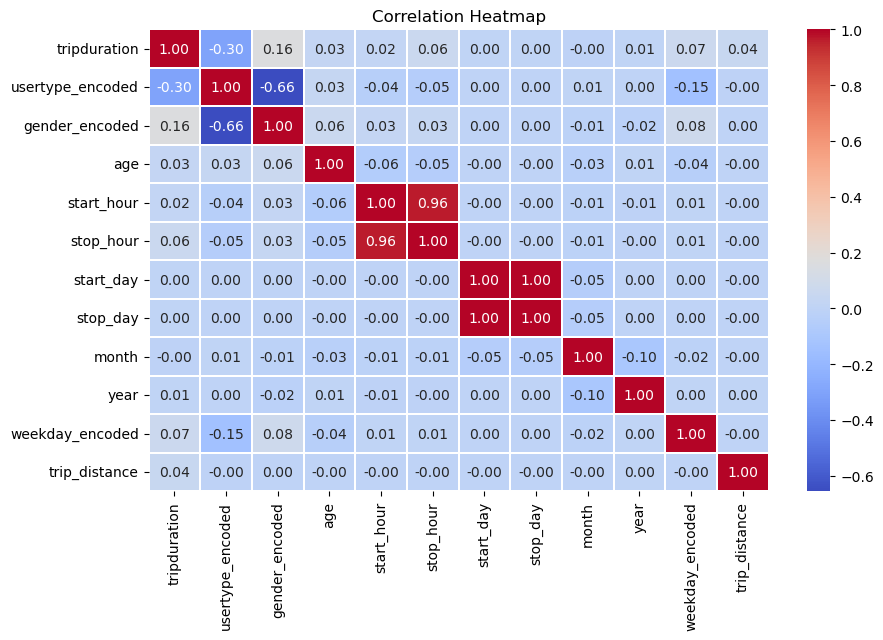

In [72]:

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()


#### As expected, start time and stop time have a very high correlation - indicating shorter trips. Other than that we have no clear linear trends between the variables

### Scatterplots

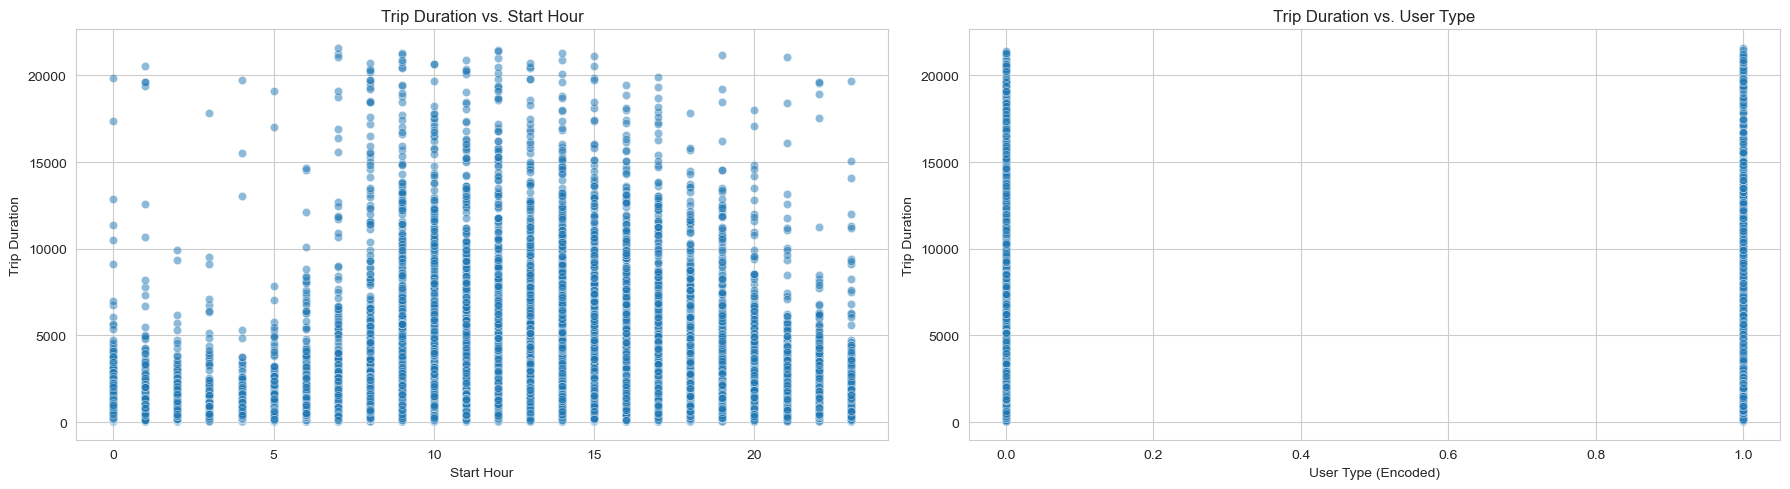

In [125]:
# Setting the style

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Scatterplot 1: Trip Duration vs. Start Hour
sns.scatterplot(ax=axes[0], x=trips_new['start_hour'], y=trips_new['tripduration'], alpha=0.5)
axes[0].set_title("Trip Duration vs. Start Hour")
axes[0].set_xlabel("Start Hour")
axes[0].set_ylabel("Trip Duration")

# Scatterplot 2: Trip Duration vs. User Type
sns.scatterplot(ax=axes[1], x=trips_new['usertype_encoded'], y=trips_new['tripduration'], alpha=0.5)
axes[1].set_title("Trip Duration vs. User Type")
axes[1].set_xlabel("User Type (Encoded)")
axes[1].set_ylabel("Trip Duration")

# Show the plots
plt.tight_layout()
plt.show()


#### 1. Trip duration is widely spread across different start hours.
However, there might be a slight pattern where longer trip durations appear more frequently during mid-morning to afternoon hours (e.g., 10 AM - 5 PM).
Further aggregation (e.g., averaging trip duration per hour) might clarify trends.

#### 2. The user types have a wide range of trip durations, suggesting that user type alone does not strongly determine trip duration.

### Pair Plot 

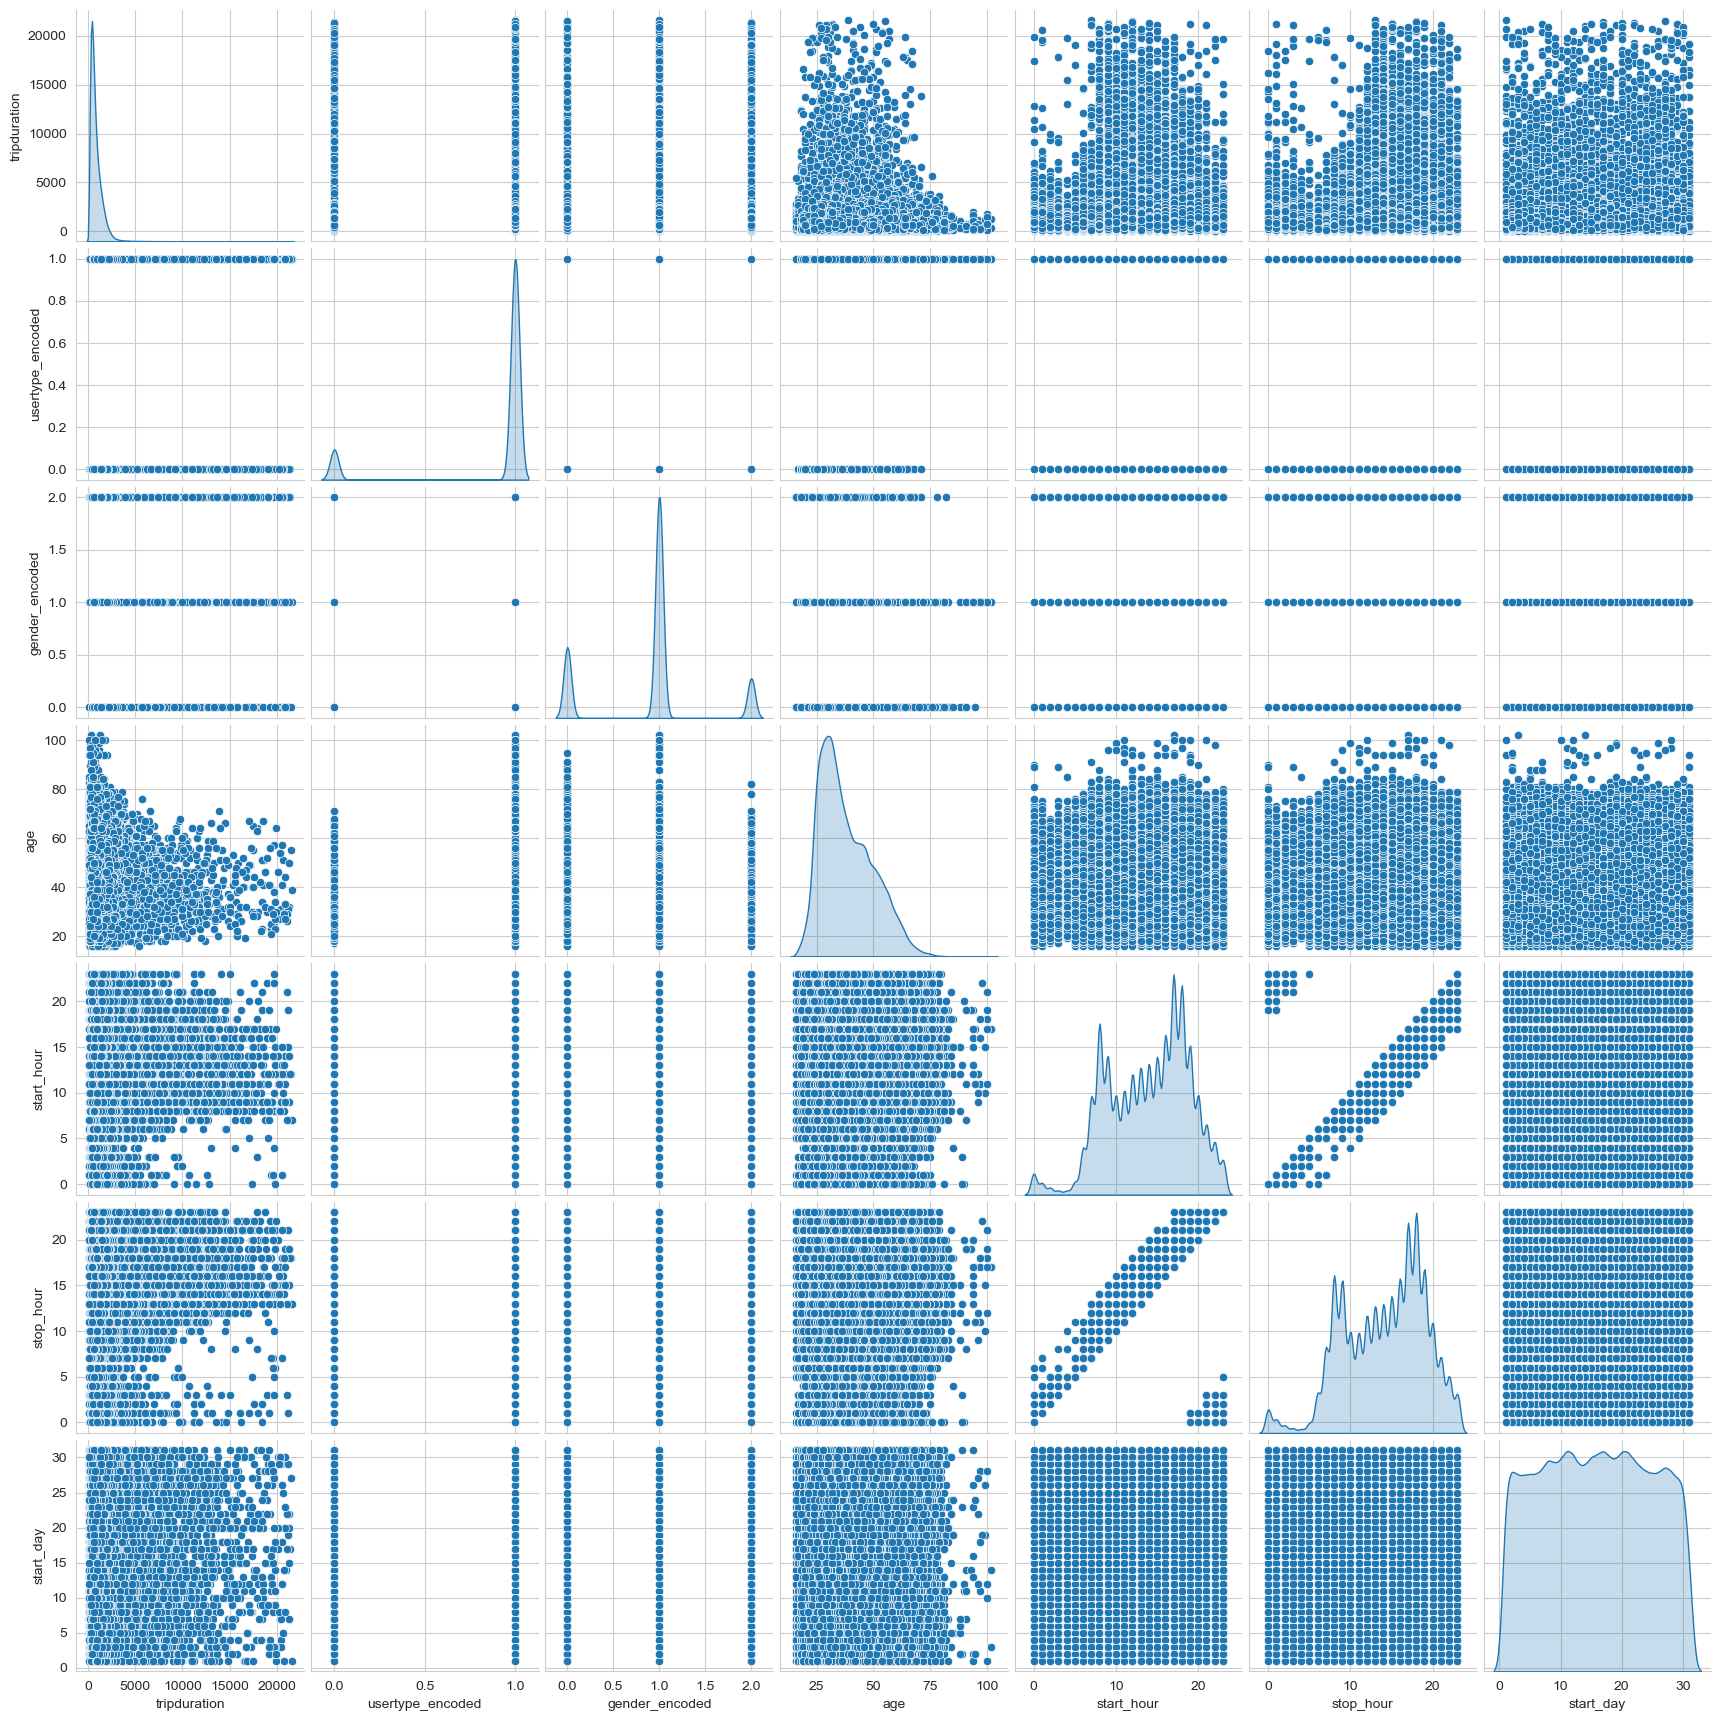

In [119]:
pairplot_df = trips_new[['tripduration','usertype_encoded', 'gender_encoded', 'age', 'start_hour',
       'stop_hour', 'start_day']]

sns.pairplot(pairplot_df, diag_kind='kde', markers=['o', 's', 'D'])

#### Interesting insights to explore: 
    1. younger people tend to have longer trips
    2. tripduration increases from around 10-5pm
    

### Categorical Plot 

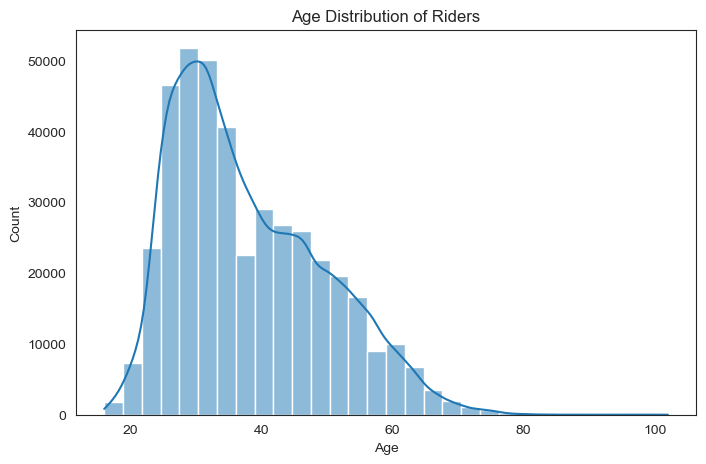

In [129]:
## investigating age distribution of riders

sns.set_style("white")
plt.figure(figsize=(8,5))
sns.histplot(trips['age'], bins=30, kde=True)
plt.title("Age Distribution of Riders")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [139]:
## categorize ages 
trips_new.loc[trips_new['age'] < 30, 'Age_Distribution'] = 'Youths'
trips_new.loc[(trips_new['age'] >= 30) & (trips_new['age'] < 65), 'Age_Distribution'] = 'Adults'
trips_new.loc[trips_new['age'] >= 65, 'Age_Distribution'] = 'Elderly'

In [144]:
trips_new['Age_Distribution'].value_counts()

Age_Distribution
Adults     296176
Youths     113589
Elderly      7402
Name: count, dtype: int64

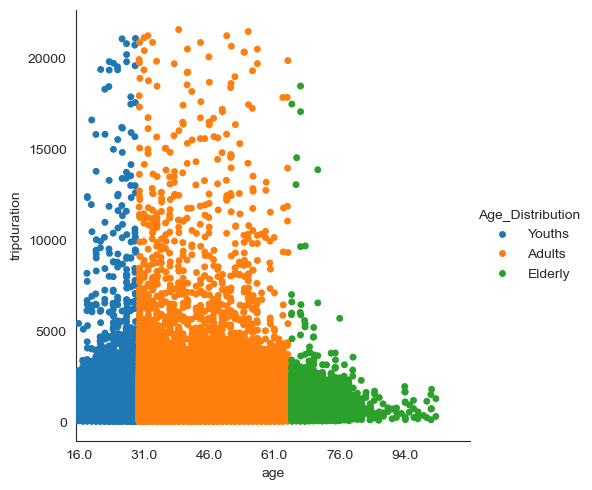

In [160]:
## creating catplot 


g = sns.catplot(x="age", y="tripduration", hue="Age_Distribution", data=trips_new)
g.set(xticks=range(0, 101, 15)) 

#### We can see that most trips are for adults ( between 30 and 65 years. Also, older people tend to have shorter trips

## 3. Hypotheses & Questions to Explore

#### Spring & Summer have the most trips compared to winter 
#### Bike trips peak between 10am - 5pm 
#### Customers have longer trips in comparison with subscribers ( tourists, visiting,etc...)
#### What are the rush hours?
#### Weekends vs Weekdays?

In [ ]:
date = trips_new[['startdate', ]]